# WINE QUALITY ANALYSIS


In [1]:
### Importing the necessary libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
### Loading the data 
dataset = pd.read_excel("data.xlsx")

### Exploratory Data Analysis 

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [5]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

We can see that we do have some missing values .But we have 1599 samples of data and only 3 rows have missing values .Imputing each one of them would be a little too complex and since their count is not very significant we can safely drop the rows with missing values. 

In [6]:
dataset.dropna(inplace=True, axis=0)

In [7]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
dataset.shape

(1596, 12)

In [9]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.321366,0.527666,0.271128,2.536936,0.087487,15.882206,46.431078,0.996745,3.498716,0.658189,10.424217,5.636591
std,1.742121,0.179154,0.194847,1.408341,0.047107,10.467380,32.893072,0.001889,0.080297,0.169587,1.066046,0.807963
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997842,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


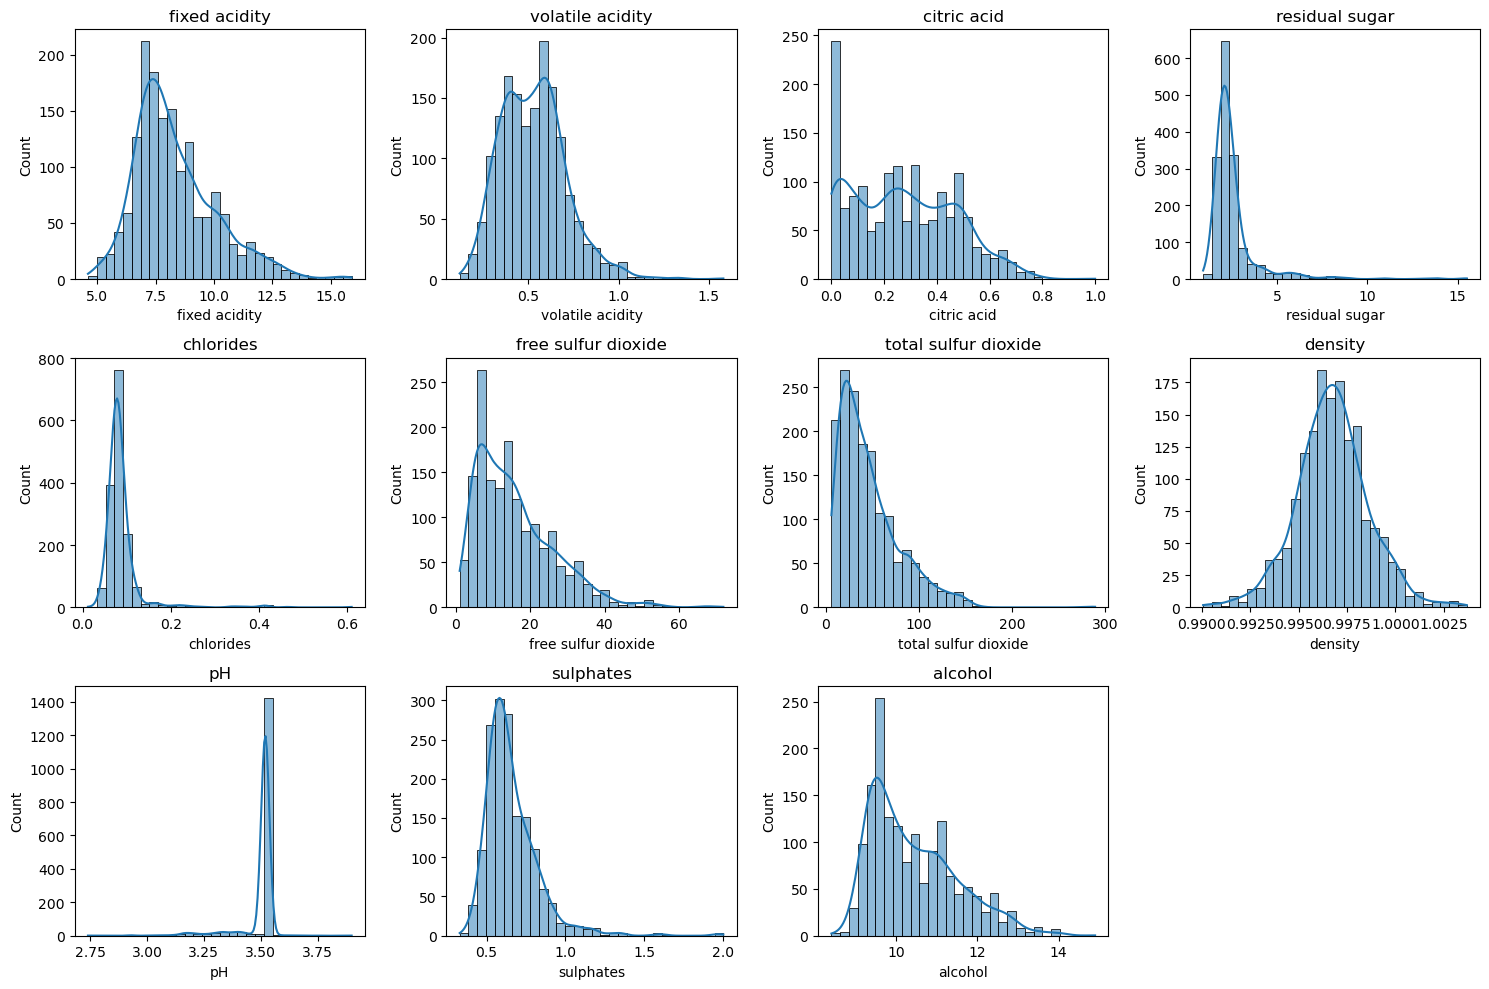

In [10]:
#distribution of each feaure 

plt.figure(figsize=(15, 10))
for i, col in enumerate(dataset.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    sns.histplot(dataset[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

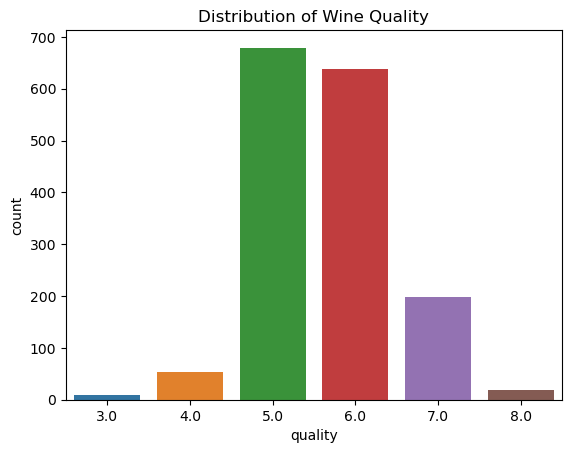

In [11]:
sns.countplot(x='quality', data=dataset)
plt.title('Distribution of Wine Quality')
plt.show()

We can clearly observe that the Target data is imbalanced. The most wines have quality rating of 5 and 6
hence we need to devise a strategy make it balanced. Imabalanced data causes a lot issues for our final 

#### Exploring Individual Columns 

In [46]:
upper_org =dataset.quantile(0.75)+1.5 *(dataset.quantile(0.75)-dataset.quantile(0.25))
lower_org = dataset.quantile(0.25)-1.5 *(dataset.quantile(0.75)-dataset.quantile(0.25))


cont_features  = dataset.drop(columns =["quality"])

columns_to_be_checked=cont_features

for i in columns_to_be_checked:

    
    print('\nColumn -> ',i,'\n')
    
    x= dataset[ (dataset[i]<round(lower_org[i],2)) |  (dataset[i]>round(upper_org[i],2))][i].to_list()
    print('Skewness -> ',round(dataset[i].skew(),3) ,' | Outliers presesnt in Original Dataset -> ',len(x),'  Out of Total -> ',len(dataset))
    print('\n','*'*10)


Column ->  fixed acidity 

Skewness ->  0.98  | Outliers presesnt in Original Dataset ->  49   Out of Total ->  1596

 **********

Column ->  volatile acidity 

Skewness ->  0.674  | Outliers presesnt in Original Dataset ->  15   Out of Total ->  1596

 **********

Column ->  citric acid 

Skewness ->  0.318  | Outliers presesnt in Original Dataset ->  1   Out of Total ->  1596

 **********

Column ->  residual sugar 

Skewness ->  4.559  | Outliers presesnt in Original Dataset ->  154   Out of Total ->  1596

 **********

Column ->  chlorides 

Skewness ->  5.675  | Outliers presesnt in Original Dataset ->  109   Out of Total ->  1596

 **********

Column ->  free sulfur dioxide 

Skewness ->  1.249  | Outliers presesnt in Original Dataset ->  30   Out of Total ->  1596

 **********

Column ->  total sulfur dioxide 

Skewness ->  1.519  | Outliers presesnt in Original Dataset ->  55   Out of Total ->  1596

 **********

Column ->  density 

Skewness ->  0.073  | Outliers presesnt in 

From the above analysis it is quite clear that the columns which has most number of outliers are the 
1. residual sugar
2. ph
3. Chlorides

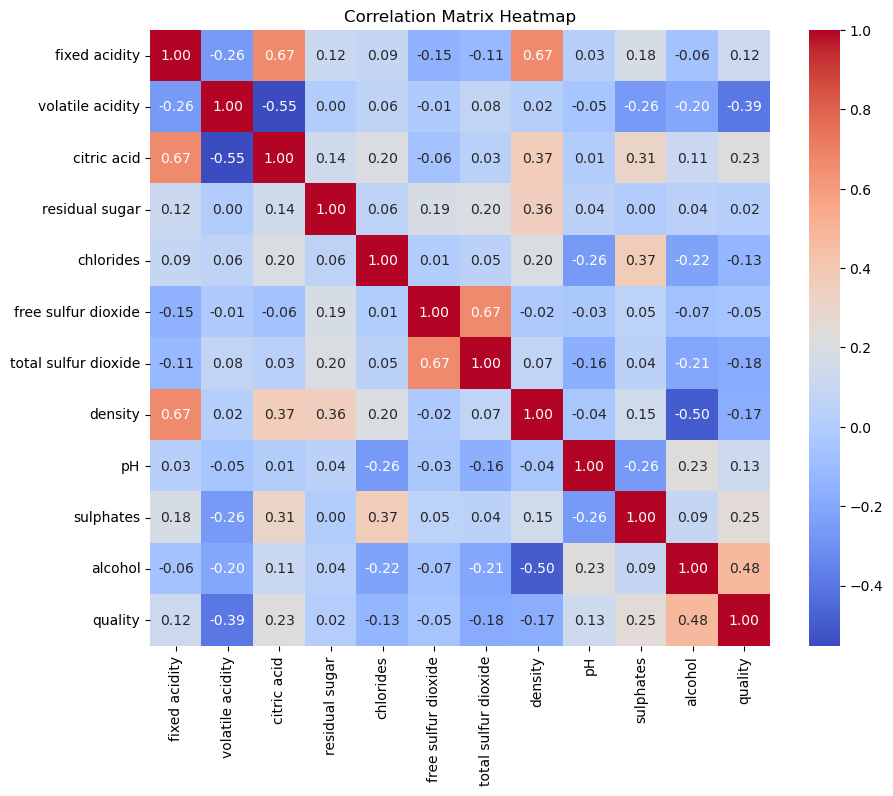

In [12]:
### Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

From the correlation Matrix we can see that the features that are highly correlated are :
1. Fixed Acidity and Citric Acid (0.67)
2. Free Sulfur Dioxide and Total Sulfur Dioxide (0.67)
3. Fixed Acidity and Density (0.67)
4. Alcohol and Quality (0.48)

We can keep Fixed Acidity or citric acis and denisty and Total Sulphur Dioxide or Free sulphur dioxide . 


Alchohol and Quality being moderately correlated is understable as quality of wine largely depends upon the quality of alcohol which in turn is dependent on chemicals used 

### Data Preprocessing 

In [13]:
### Splitting the dataset 
y = dataset['quality']
X = dataset.drop(columns=['quality'])

In [14]:
X.shape,y.shape

((1596, 11), (1596,))

In [15]:
### Train Test Split 
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1276, 11), (320, 11), (1276,), (320,))

### Model Selection

Although we can decide a model based on the dataset provided . The dataset is imbalance and hence any ensemble model would be best suited for the given data . But lets start with the most basic Classification Model i.e Logistic Regression

#### Logistic Regression

In [16]:
###Logistic regression
from sklearn.linear_model import LogisticRegression 
Log_Reg = LogisticRegression(max_iter = 1000)

In [17]:
#Scaling the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtrain_scaled = scaler.fit_transform(X_train)
xtest_scaled = scaler.transform(X_test)

In [18]:
Log_Reg.fit(xtrain_scaled,y_train)

LogisticRegression(max_iter=1000)

In [19]:
train_accuracy = accuracy_score(y_train,Log_Reg.predict(xtrain_scaled))

In [20]:
test_accuracy = accuracy_score(y_test,Log_Reg.predict(xtest_scaled))

In [21]:
print(f"Training accuracy for Logistic Regression : {train_accuracy}")
print(f"Test accuracy for Logistic Regression : {test_accuracy}")

Training accuracy for Logistic Regression : 0.6018808777429467
Test accuracy for Logistic Regression : 0.575


Clearly A simple Logistic Regression is not a very good choice for this type of data and it is also clear that is overfitting . 

#### Random Forest Classifier and Decision Tree Classifier  

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [23]:
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()

#### 1. Decision Tree Classifier 

In [24]:
params = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[1,4,6,9,10]
}
model_tree = GridSearchCV(estimator = decision_tree , param_grid=params , scoring = 'accuracy', cv = 5)

In [25]:
model_tree.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 4, 6, 9, 10]},
             scoring='accuracy')

In [26]:
### best parameters
model_tree.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [27]:
model_tree.best_score_

0.5639165360501568

In [28]:
print(f"Training Score for Decision Tree Classifier: {model_tree.score(X_train,y_train)}")
print(f"Test Score for Decision Tree Classifier: {model_tree.score(X_test,y_test)}")

Training Score for Decision Tree Classifier: 0.6214733542319749
Test Score for Decision Tree Classifier: 0.621875


#### 2. Random Forest Classifier 

In [29]:
params = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth': [1,4,6,8,10]
}
model_forest = GridSearchCV(estimator = random_forest , param_grid = params , cv = 5)

In [30]:
model_forest.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 4, 6, 8, 10]})

In [31]:
model_forest.best_score_

0.5971512539184953

In [32]:
model_forest.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [33]:
print(f"Training Accuracy for Random Forest : {model_forest.score(X_train,y_train)}")
print(f"Test Accuracy for Random Forest : {model_forest.score(X_test,y_test)}")

Training Accuracy for Random Forest : 0.7233542319749217
Test Accuracy for Random Forest : 0.721875


A score of 72 is definitely a decent enough score . But lets explore further and create a function for checking multiple Models and evalutaing them 

In [34]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
    
    print('Starting ...')
    
    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train)
    X_test_ss = ss.fit_transform(X_test)
    print("Scaling process is done ...")
    
    print("**********************************")
    
    print("Model building process is started ...")
    mod = model.fit(X_train, y_train)
    mod_pred = model.predict(X_test)
    print("Model creation process is done ...")
    
    print("**********************************")
    print("Evaluation of the Model")
    print("***********************************")
    
    print("Classification report of the Model: \n {}".format(classification_report(y_test, mod_pred)))
    print("Confusion Matrix of the given Model: \n {}".format(confusion_matrix(y_test, mod_pred)))
    print("Accuracy score of the Model: \n{}".format(accuracy_score(y_test, mod_pred)))
    
    print("Evaluation process is done ...")
    
    print("***********************************************")
    
    return mod


#### Importing Libraries for further Models 

In [39]:
from sklearn.svm import SVC
import xgboost
import catboost

#### Support Vector Classifier 

In [40]:
svc = SVC()
model_evaluation(svc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00        12
         5.0       0.61      0.36      0.46       140
         6.0       0.40      0.78      0.53       122
         7.0       0.00      0.00      0.00        42
         8.0       0.00      0.00      0.00         3

    accuracy                           0.46       320
   macro avg       0.17      0.19      0.16       320
weighted avg       0.42      0.46      0.40       320

Confusion Matrix of the given Model: 
 [[ 0  0  0  1  0  0]
 [ 0  0  4  8  0  0]
 [ 0  0 51 89  0  0]
 [ 0  0 27 95  0  0]
 [ 0  0  2 40  0  0]
 [ 0  0  0  3  0  0]]
Accuracy 

C:\Users\rajni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC()

#### CAT BOOST

In [42]:
cat = catboost.CatBoostClassifier()
model_evaluation(cat, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Learning rate set to 0.080116
0:	learn: 1.6824281	total: 180ms	remaining: 2m 59s
1:	learn: 1.5965419	total: 214ms	remaining: 1m 46s
2:	learn: 1.5211799	total: 237ms	remaining: 1m 18s
3:	learn: 1.4569651	total: 254ms	remaining: 1m 3s
4:	learn: 1.4004892	total: 265ms	remaining: 52.8s
5:	learn: 1.3531915	total: 275ms	remaining: 45.6s
6:	learn: 1.3087807	total: 286ms	remaining: 40.6s
7:	learn: 1.2707925	total: 294ms	remaining: 36.5s
8:	learn: 1.2350061	total: 303ms	remaining: 33.3s
9:	learn: 1.2025752	total: 315ms	remaining: 31.2s
10:	learn: 1.1749296	total: 323ms	remaining: 29s
11:	learn: 1.1494663	total: 329ms	remaining: 27.1s
12:	learn: 1.1277982	total: 336ms	remaining: 25.5s
13:	learn: 1.1041385	total: 344ms	remaining: 24.2s
14:	learn: 1.0837471	total: 353ms	remaining: 23.2s
15:	learn: 1.0661918	total: 360ms	remaining: 22.2s
16:	learn: 1.0493430	total: 374ms	remaining: 21.6

C:\Users\rajni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Summary

1. The features provided in the dataset was of chemicals that make up a wine and the target was the quality of the wine (10 point scale)

2. The dataset was imbalance which means that there were unequal number of target quality values for each class ,classes being the rating

3. The features which were highly correlated with eachother were : Fixed Acidity and Citric Acid (0.67),Free Sulfur Dioxide and Total Sulfur Dioxide (0.67), Fixed Acidity and Density (0.67)

4. The model which performed best for this type fo dataset : Random Forest Classifier 